<a href="https://colab.research.google.com/github/stardust453/Customer-Clustering-for-eCommerce-Transactions-dataset/blob/main/satyam_sahu_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 1: Exploratory Data Analysis (EDA) and Business Insights**


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [51]:
# Step 3: Calculate Cosine Similarity
# Create customer features based on merged data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

products['Price'] = pd.to_numeric(products['Price'])

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Quantity'] = pd.to_numeric(transactions['Quantity'])
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'])
transactions['Price'] = pd.to_numeric(transactions['Price'])
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

customer_features = merged_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Region': 'first',  # Assuming Region is constant for each customer
    'ProductID': 'nunique'  # Number of unique products purchased
}).reset_index()


In [52]:

# One-hot encode the Region feature
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [53]:
# Handle data types and missing values
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

products['Price'] = pd.to_numeric(products['Price'])

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Quantity'] = pd.to_numeric(transactions['Quantity'])
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'])
transactions['Price'] = pd.to_numeric(transactions['Price'])


In [54]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'ProductID']])

In [55]:
# Determine optimal number of clusters using Davies-Bouldin Index
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
db_indices = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
    db_indices.append(db_index)

# Find the optimal number of clusters with the lowest DB Index
optimal_clusters = cluster_range[np.argmin(db_indices)]
print(f"Optimal Number of Clusters: {optimal_clusters}")

Optimal Number of Clusters: 2


In [56]:
#Fit KMeans with optimal clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans_optimal.fit_predict(scaled_features)

In [57]:

from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, customer_features['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.4903654724460657


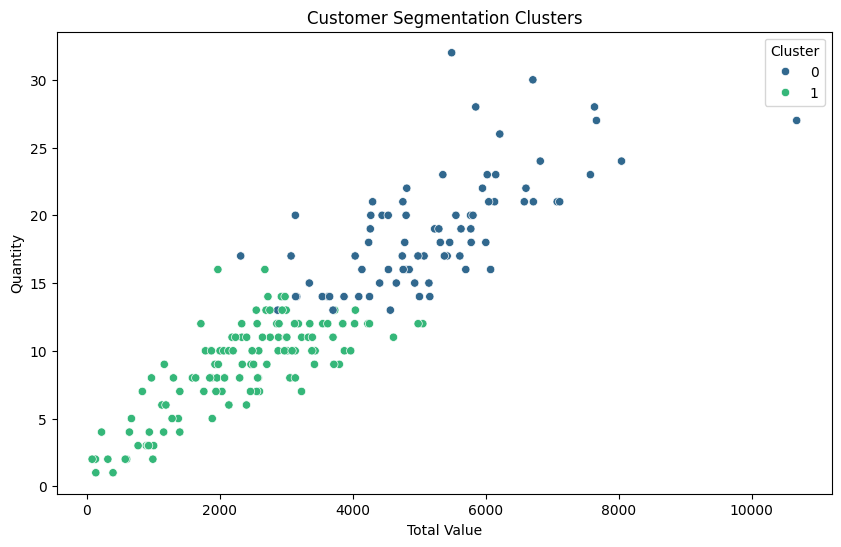

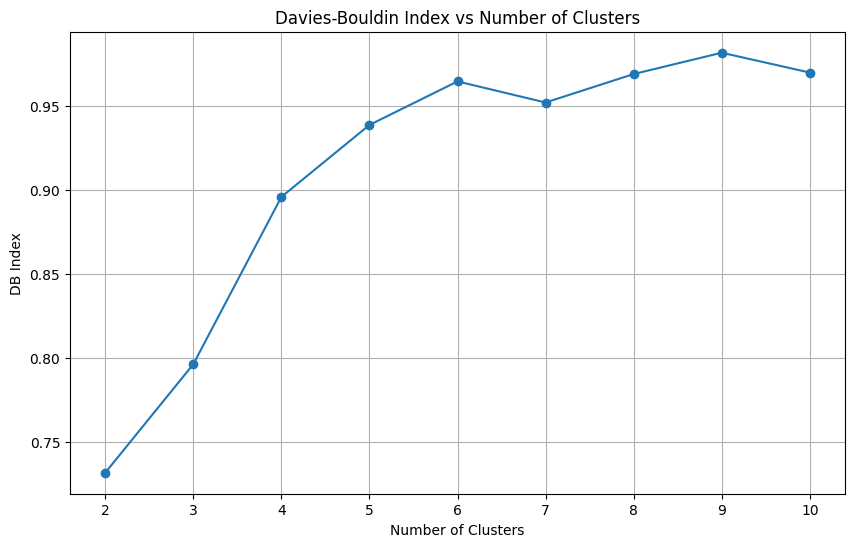

In [58]:
# Visualize clusters using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_features['TotalValue'], y=customer_features['Quantity'],
                hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

# Plot DB Index vs Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_indices, marker='o')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [59]:
# Prepare clustering results summary
report_data = {
    "Number of Clusters": optimal_clusters,
    "DB Index": min(db_indices),
    "Silhouette Score": silhouette_avg,
}

report_df = pd.DataFrame(report_data.items(), columns=['Metric', 'Value'])
print("\nClustering Results:")
print(report_df)

# Save clustering results to a CSV file for reporting
report_df.to_csv('Customer_Segmentation_Report.csv', index=False)



Clustering Results:
               Metric     Value
0  Number of Clusters  2.000000
1            DB Index  0.731792
2    Silhouette Score  0.490365
